# **Credit Card Fraud Detection**

### Problem Statement

* 1. A credit card is a small thin plastic or fiber card that incorporates
 information about the person such as a picture or signature and the
 person’s name on it to charge purchases and services to his linked
 account. Charges are debited regularly. Nowadays, card data is read by
 ATMs, swiping machines, store readers, banks and online transactions.

* 2. Each card has a unique card number which is very important. Its security
 mainly relies on the physical security of the card and also the privacy of the
 credit card number. There is a rapid growth in credit card transactions
 which has led to substantial growth in scam cases.
 
* 3. Credit card fraud is expanding heavily because fraud financial loss is
 increasing drastically. Multiple data mining and statistical techniques are
 used to catch fraud. Therefore the detection of fraud using efficient and
 secured methods are very important.

# Tasks To Be Performed:

### import Important Libraries

In [27]:
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score

In [2]:
# Version Handeling
print("pandas", pd.__version__)
print("seaborn", sns.__version__)
print("matplotlib", matplotlib.__version__)
print("scikit-learn", sklearn.__version__)

pandas 2.2.2
seaborn 0.13.2
matplotlib 3.9.2
scikit-learn 1.5.2


### Load the dataset using the pandas module.

In [3]:
df = pd.read_csv("Datasets/credit_card_fraud_detection.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


### Perform missing value analysis on the dataset.

In [4]:
df.shape

(11665, 31)

In [5]:
df = df.dropna()
df.isna().sum().sum()

0

In [6]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [7]:
df["Class"] = df["Class"].astype(int)

### From the dataset, calculate the number of genuine transactions, number of fraud transactions and the percentage of fraud transactions.

In [8]:
non_fraud = (df["Class"] == 0).sum()
fraud = (df["Class"] == 1).sum()
fraud_per = (fraud / (fraud + non_fraud) * 100).round(2)

print(f"Number of Genuine transactions: {non_fraud}")
print(f"Number of Fraud transactions: {fraud}")
print(f"Percentage of Fraud transactions: {fraud_per}%")

Number of Genuine transactions: 11571
Number of Fraud transactions: 49
Percentage of Fraud transactions: 0.42%


### Using the visualization module, visualize the genuine and fraudulent transactions using a bar graph.

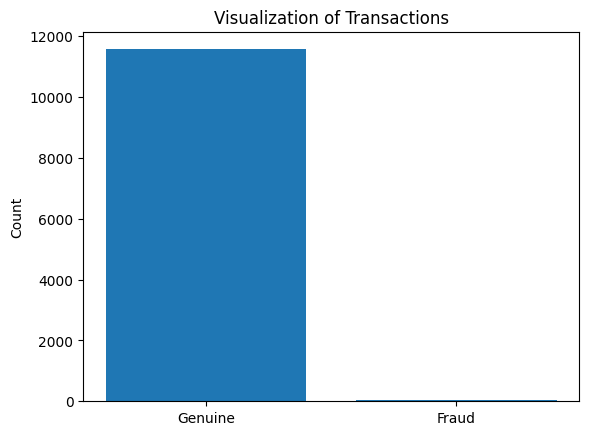

In [9]:
plt.bar(df["Class"].value_counts().index, df["Class"].value_counts())

plt.xticks(range(2), ["Genuine", "Fraud"])
plt.title("Visualization of Transactions")
plt.ylabel("Count")
plt.show()

### Using the Standard Scaler module, normalize the amount column and store the new values in the NormalizedAmount column.

In [10]:
ss = StandardScaler()
df["NormalizedAmount"] = ss.fit_transform(df["Amount"].values.reshape(-1, 1))
df.drop(columns=["Amount", "Time"], inplace= True)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,NormalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.481127
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.334618
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.752740
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.336110
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.039027


### Split the dataset in train and test set and have a 70:30 split ratio for the model.

In [12]:
x = df.drop(columns=["Class"])
y = df["Class"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

### Now use a decision tree and random forest model for training on top of the train set.

In [15]:
# Decision Tree Model
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)

# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(x_train, y_train)

RandomForestClassifier()

### Compare the predictions of both models using predict().

In [25]:
y_pred_dt = dt_model.predict(x_test)
y_pred_rf = rf_model.predict(x_test)

print("Decision Tree Prediction: ", y_pred_dt[:300:9])
print("Random Forest Prediction: ", y_pred_rf[:300:9])

Decision Tree Prediction:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Random Forest Prediction:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


### Compare the accuracy of both models using score().

In [26]:
dt_score = dt_model.score(x_test, y_test)*100
rf_score = rf_model.score(x_test, y_test)*100

print("Decision Tree Score: ", dt_score)
print("Random Forest Score: ", rf_score)

Decision Tree Score:  99.82788296041308
Random Forest Score:  100.0


### Check the performance matrix of both models and compare which model is having the highest performance.

In [34]:
def performanceMatrix(actual, prediction):
    print(f"Accuracy: {accuracy_score(actual, prediction)*100:0.2f}%")
    print(f"Recall: {recall_score(actual, prediction)}")
    print(f"Pricision: {precision_score(actual, prediction)}")
    print(f"F1-Score: {f1_score(actual, prediction)}")
    print(f"confusion_matrix:\n {confusion_matrix(actual, prediction.round())}")

In [36]:
performanceMatrix(y_test, y_pred_dt)

Accuracy: 99.83%
Recall: 0.8947368421052632
Pricision: 0.8095238095238095
F1-Score: 0.85
confusion_matrix:
 [[3463    4]
 [   2   17]]


In [37]:
performanceMatrix(y_test, y_pred_rf)

Accuracy: 100.00%
Recall: 1.0
Pricision: 1.0
F1-Score: 1.0
confusion_matrix:
 [[3467    0]
 [   0   19]]
